# Multiple Linear Regression

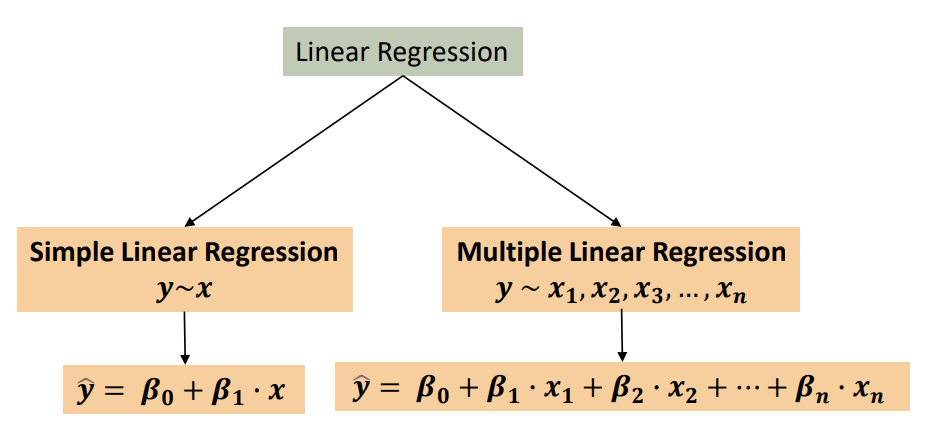

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the Datasets

In [2]:
import os 
os.chdir('C:/Datasets/')

In [4]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## Create Model
Profit ~ RND,MKT,ADMIN

## Seperate Dependent(Y) and Independent(X) Features

In [13]:
X = df[['RND','MKT','ADMIN']]
Y = df[['PROFIT']]

In [14]:
X.head()

,RND,MKT,ADMIN
0,165349.20,471784.10,136897.80
1,162597.70,443898.53,151377.59
2,153441.51,407934.54,101145.55
3,144372.41,383199.62,118671.85
4,142107.34,366168.42,91391.77


In [15]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Create Linear Regression Object

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [17]:
model.intercept_

array([50122.19298987])

In [18]:
model.coef_

array([[ 0.80571505,  0.02722806, -0.02681597]])

~~~ 
PROFIT = 50122.19 + 0.8057*RND + 0.0272*ADMIN - 0.0268*MKT
~~~

In [20]:
# R2 Score
model.score(X,Y)

0.9507459940683246

## Predict values for X

In [23]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [24]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Evaluate the Model on MAE,MSE,RMSE,R2

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
mse = mean_squared_error(Y,ypred)
mse

78417126.01913084

In [27]:
rmse = mse**(1/2)
rmse

8855.344489015142

In [28]:
mae = mean_absolute_error(Y,ypred)
mae

6471.450396104811

In [29]:
r2 = r2_score(Y,ypred)
r2

0.9507459940683246

# Conclusions:

1.More RND budget will increases the PROFIT.

2.PROFIT = 50122.19 + 0.8057xRND + 0.0272xADMIN - 0.0268xMKT

In [30]:
X.columns

Index(['RND', 'MKT', 'ADMIN'], dtype='object')

In [32]:
budget = [[150000,200000,150000]]
pred = model.predict(budget)
pred

array([[172402.66817818]])